# The Project #
1. This is a project with minimal scaffolding. Expect to use the the discussion forums to gain insights! It’s not cheating to ask others for opinions or perspectives!
2. Be inquisitive, try out new things.
3. Use the previous modules for insights into how to complete the functions! You'll have to combine Pillow, OpenCV, and Pytesseract
4. There are hints provided in Coursera, feel free to explore the hints if needed. Each hint provide progressively more details on how to solve the issue. This project is intended to be comprehensive and difficult if you do it without the hints.

### The Assignment ###
Take a [ZIP file](https://en.wikipedia.org/wiki/Zip_(file_format)) of images and process them, using a [library built into python](https://docs.python.org/3/library/zipfile.html) that you need to learn how to use. A ZIP file takes several different files and compresses them, thus saving space, into one single file. The files in the ZIP file we provide are newspaper images (like you saw in week 3). Your task is to write python code which allows one to search through the images looking for the occurrences of keywords and faces. E.g. if you search for "pizza" it will return a contact sheet of all of the faces which were located on the newspaper page which mentions "pizza". This will test your ability to learn a new ([library](https://docs.python.org/3/library/zipfile.html)), your ability to use OpenCV to detect faces, your ability to use tesseract to do optical character recognition, and your ability to use PIL to composite images together into contact sheets.

Each page of the newspapers is saved as a single PNG image in a file called [images.zip](./readonly/images.zip). These newspapers are in english, and contain a variety of stories, advertisements and images. Note: This file is fairly large (~200 MB) and may take some time to work with, I would encourage you to use [small_img.zip](./readonly/small_img.zip) for testing.

Here's an example of the output expected. Using the [small_img.zip](./readonly/small_img.zip) file, if I search for the string "Christopher" I should see the following image:
![Christopher Search](./readonly/small_project.png)
If I were to use the [images.zip](./readonly/images.zip) file and search for "Mark" I should see the following image (note that there are times when there are no faces on a page, but a word is found!):
![Mark Search](./readonly/large_project.png)

Note: That big file can take some time to process - for me it took nearly ten minutes! Use the small one for testing.

In [1]:
import zipfile

from PIL import Image, ImageDraw, ImageFilter
import pytesseract
import cv2 as cv
import numpy as np
import inspect 
from IPython.display import display

# loading the face detection classifier
face_cascade = cv.CascadeClassifier('readonly/haarcascade_frontalface_default.xml')
face_profile_cascade = cv.CascadeClassifier('readonly/haarcascade_profileface.xml') 

In [2]:
zip_test=zipfile.ZipFile(r"C:\Users\vk_27\Desktop\Coursera\Python3\small_img.zip")
print(zip_test)

# I have tried to use the Image.open before extracting the zipped files, 
# and seemed that Image.open couldn`t access the object inside zip (a zip object), 
# so we have to extract the files 1st. 

zip_test.extractall() #extracting all the files from the zipped file 

<zipfile.ZipFile filename='C:\\Users\\vk_27\\Desktop\\Coursera\\Python3\\small_img.zip' mode='r'>


In [3]:
pytesseract.pytesseract.tesseract_cmd = r"C:\Users\vk_27\AppData\Local\Programs\tesseract"

In [4]:
# As per Hint 1, defining the function that goes through the zipfile, printing out the name of the file as well as using display()
# As per Hint 2, creating dictionary with lists of files` names, pil object, text, etc.

dict_files={}
f_names=[]

def extract_files(fname):

    with zipfile.ZipFile(fname) as f_n:
        f_n.extractall()
        for n in f_n.namelist():
            print(n)
            f_names.append(n)
            dict_files[n]=[Image.open(n)]
            display(dict_files[n])

## Test1: Using "Christopher" and small_im.zip

In [5]:
extract_files(r"C:\Users\vk_27\Desktop\Coursera\Python3\small_img.zip")

a-0.png


[<PIL.PngImagePlugin.PngImageFile image mode=RGB size=3600x6300 at 0x2BA0E5B6490>]

a-1.png


[<PIL.PngImagePlugin.PngImageFile image mode=RGB size=3600x6300 at 0x2BA0E5B6400>]

a-2.png


[<PIL.PngImagePlugin.PngImageFile image mode=RGB size=3600x6300 at 0x2BA219BA280>]

a-3.png


[<PIL.PngImagePlugin.PngImageFile image mode=RGB size=7200x6300 at 0x2BA219BA0D0>]

Results found in file a-0.png


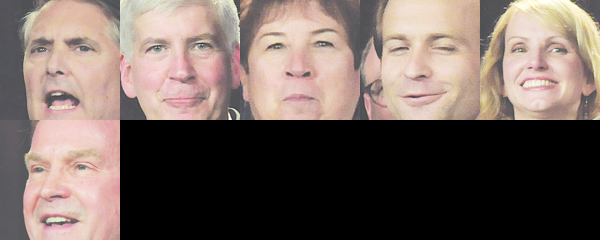

No faces in this file! a-1.png
No faces in this file! a-2.png
Results found in file a-3.png


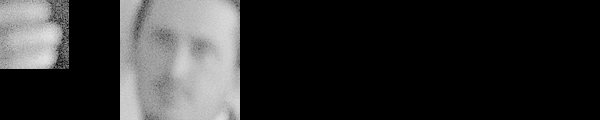

In [6]:
for n in f_names:
    
    im=dict_files[n][0]
    text=pytesseract.image_to_string(im)
    text.replace("-\n","")
    dict_files[n].append(text)
    
    if "Christopher" in dict_files[n][1]:
        print ("Results found in file", n)
        
        im=Image.open(n)
        im1=cv.imread(n)
        gray=cv.cvtColor(im1, cv.COLOR_BGR2GRAY)
        faces=face_cascade.detectMultiScale(gray, 1.2,5)
        #ict_files[n].append(faces)
        #drawing=ImageDraw.Draw(im)
        
        im_small=[]
       
        for x,y,w,h in faces.tolist():
            #drawing.rectangle((x,y,x+w,y+h), outline="white")
            im_s=im.crop((x,y,x+w,y+h))
            im_small.append(im_s)
            
            contact_sheet=Image.new(im_s.mode, (120*5, 120*int(len(im_small)//5+1)))
            
            #contact_sheet=Image.new(im.mode, (550*2,120*int(len(im_small)/5)))
            x=0
            y=0

        for im in im_small:
    # Lets paste the current image into the contact sheet
            im.thumbnail((120,120))
            contact_sheet.paste(im, (x, y) )
    # Now we update our X position. If it is going to be the width of the image, then we set it to 0
    # and update Y as well to point to the next "line" of the contact sheet.
            if x+120 == contact_sheet.width:
                x=0
                y=y+120
            else:
                x=x+120

        display(contact_sheet)
    else:
        print("No faces in this file!", n)

## Test 2: Using "Mark" and images.zip 


In [10]:
dict_files1={}
f_names1=[]

def extract_files(fname):

    with zipfile.ZipFile(fname) as f_n:
        f_n.extractall()
        for n in f_n.namelist():
            print(n)
            f_names1.append(n)
            dict_files1[n]=[Image.open(n)]
            display(dict_files1[n])

In [11]:
extract_files(r"C:\Users\vk_27\Desktop\Coursera\Python3\readonly/images.zip")

a-0.png


[<PIL.PngImagePlugin.PngImageFile image mode=RGB size=3600x6300 at 0x2BA219BFC40>]

a-1.png


[<PIL.PngImagePlugin.PngImageFile image mode=RGB size=3600x6300 at 0x2BA219BF190>]

a-10.png


[<PIL.PngImagePlugin.PngImageFile image mode=RGB size=6300x3600 at 0x2BA219BF040>]

a-11.png


[<PIL.PngImagePlugin.PngImageFile image mode=RGB size=3150x3600 at 0x2BA219BA310>]

a-12.png


[<PIL.PngImagePlugin.PngImageFile image mode=RGB size=3150x3600 at 0x2BA219BABE0>]

a-13.png


[<PIL.PngImagePlugin.PngImageFile image mode=RGB size=3150x3600 at 0x2BA219BF280>]

a-2.png


[<PIL.PngImagePlugin.PngImageFile image mode=RGB size=3600x6300 at 0x2BA219BA430>]

a-3.png


[<PIL.PngImagePlugin.PngImageFile image mode=RGB size=7200x6300 at 0x2BA219BAFA0>]

a-4.png


[<PIL.PngImagePlugin.PngImageFile image mode=RGB size=3600x6300 at 0x2BA219BA9A0>]

a-5.png


[<PIL.PngImagePlugin.PngImageFile image mode=RGB size=3600x6300 at 0x2BA219BACA0>]

a-6.png


[<PIL.PngImagePlugin.PngImageFile image mode=RGB size=3600x6300 at 0x2BA219BA5E0>]

a-7.png


[<PIL.PngImagePlugin.PngImageFile image mode=RGB size=3150x3600 at 0x2BA219BAE20>]

a-8.png


[<PIL.PngImagePlugin.PngImageFile image mode=RGB size=3150x3600 at 0x2BA219BA070>]

a-9.png


[<PIL.PngImagePlugin.PngImageFile image mode=RGB size=3150x3600 at 0x2BA219BAD60>]

Results found in file a-0.png


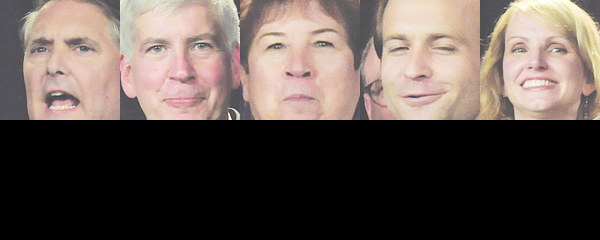

Results found in file a-1.png


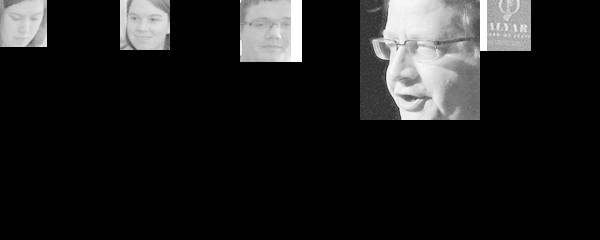

Results found in file a-10.png
No faces in this file! a-10.png
Results found in file a-13.png


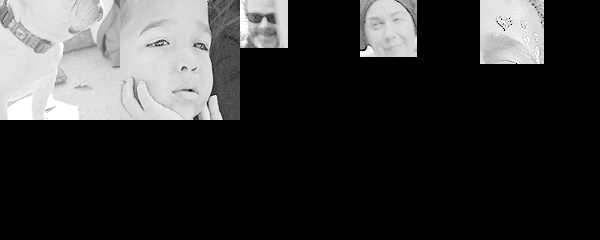

Results found in file a-2.png


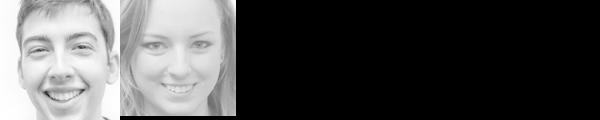

Results found in file a-3.png


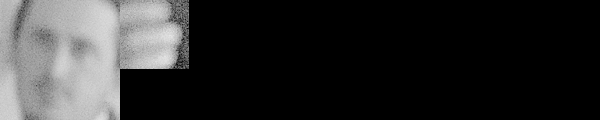

Results found in file a-8.png


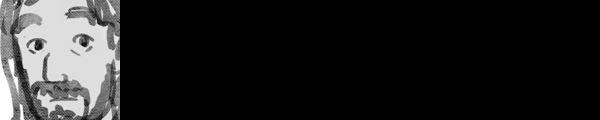

In [13]:
for n in f_names1:
    
    im=dict_files1[n][0]
    text=pytesseract.image_to_string(im)
    text.replace("-\n","")
    dict_files1[n].append(text)
    
    if "Mark" in dict_files1[n][1]:
        print ("Results found in file", n)
        try:
            im=Image.open(n)
            im1=cv.imread(n)
            gray=cv.cvtColor(im1, cv.COLOR_BGR2GRAY)
            faces=face_cascade.detectMultiScale(gray, 1.2,5)
            dict_files1[n].append(faces)
        #drawing=ImageDraw.Draw(im)
        
            im_small=[]
         
            for x,y,w,h in faces.tolist():
            #drawing.rectangle((x,y,x+w,y+h), outline="white")
                im_s=im.crop((x,y,x+w,y+h))
                im_small.append(im_s)
            
            contact_sheet=Image.new(im_s.mode, (120*5, 120*int(len(im_small)//5+1)))
            x=0
            y=0

            for im in im_small:
    # Lets paste the current image into the contact sheet
                im.thumbnail((120,120))
                contact_sheet.paste(im, (x, y) )
    # Now we update our X position. If it is going to be the width of the image, then we set it to 0
    # and update Y as well to point to the next "line" of the contact sheet.
                if x+100 == contact_sheet.width:
                    x=0
                    y=y+120
                else:
                    x=x+120
# Now lets display that composite image
            display(contact_sheet)
        except:
            print("No faces in this file!", n)